In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
import os
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
root = os.getcwd()
df = pd.read_csv(root+'/../data/expert.csv')
df929 = pd.read_csv(root+'/../data/random_partition_average_testhat_929.csv')

In [3]:
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

df2 = new_df.groupby(new_df.index).mean()
df2.head()

(27000, 87)


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.325272,-0.594653,-0.778631,-0.559506,-0.049712,-0.122504,0.112488,0.031845,0.404856,0.464636,...,-0.102794,0.005616,0.134709,0.064168,0.187661,0.031636,0.459060,-0.000425,0.023150,0.194529
1,-0.443472,-0.501390,-0.998874,-0.490441,-0.193012,0.053271,0.132526,0.046416,0.104802,0.573083,...,-0.123293,0.012541,0.202487,-0.056385,0.050613,-0.030876,0.363396,1.488718,-0.128555,0.297915
2,-0.453750,-0.622133,-0.875656,-0.623778,-0.176299,-0.070438,0.019901,0.021557,0.250733,0.412681,...,-0.064665,0.001600,0.076434,0.043301,0.240858,0.220945,0.382409,0.155630,0.079592,0.250943
3,-0.286421,-0.651768,-0.928433,-0.561911,-0.058064,-0.113389,0.064293,0.130900,0.234181,0.436583,...,-0.069313,-0.018872,0.096469,0.056001,0.184722,0.207964,0.425529,0.061343,0.048276,0.460184
4,-0.378348,-0.863770,-1.347423,-1.110955,-0.115076,-0.219796,0.315328,0.290586,0.416454,0.571893,...,-0.044506,0.006022,0.196256,0.071735,0.289397,-0.161656,0.686654,-0.022052,-0.006657,0.657212


In [4]:
x = df.iloc[:,-12:]

In [5]:
df2 = pd.concat([df2,x],axis = 1, join = "inner")
df2.shape

(89, 99)

Text(0, 0.5, 'predicted value from CellBox')

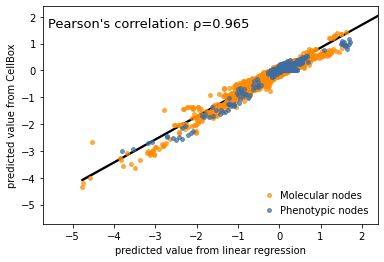

In [6]:
x_all = df2.values.flatten()
y_all = df929.values.flatten()

x_prot = df2.iloc[:,0:82]
y_prot = df929.iloc[:,0:82]
x_pheno = df2.iloc[:,82:87]
y_pheno = df929.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)

plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)

plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')

#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'orange', 'alpha': 1})
sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))


lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*0.9])
plt.ylim([lower*1.2, upper*0.9])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 13)
plt.xlabel('predicted value from linear regression')
plt.ylabel('predicted value from CellBox')
#plt.title("Correlation between linear regression and CellBox across all conditions", 
#          weight='bold', size=13)
